# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

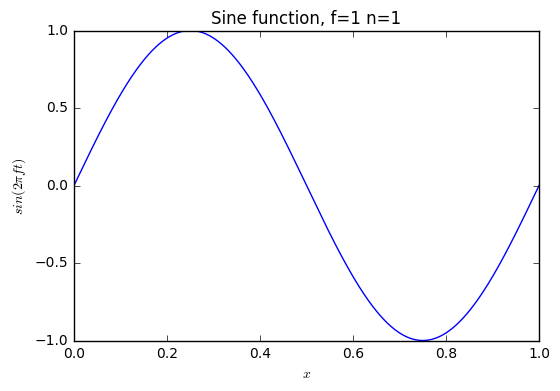

In [2]:
x = np.linspace(0, 1., 1000, endpoint=True) #Creation of the x parameter according to the data
y = np.sin(2*np.pi*x*1) #Creation of the function sin(2pift)

plt.plot(x, y) #Plot the continous signal and add the title/labels
plt.xlabel(r'$x$')
plt.ylabel(r'$sin(2\pi ft)$')
plt.title('Sine function, f=1 n=1')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

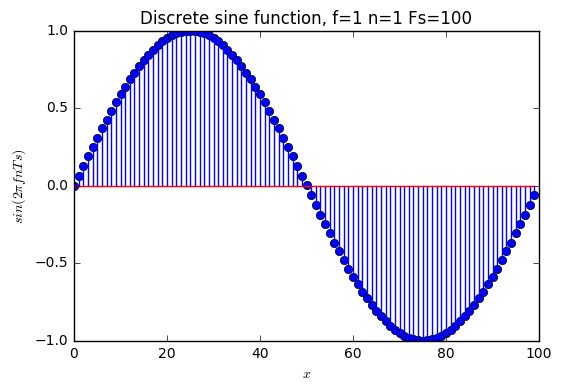

In [3]:
def sin_fn(FW=10, numP=1, sT=100): #Re-create the function created in the first lab
    x=np.arange(0, 1./FW*numP, 1./sT) 
    return np.sin(2*np.pi*x*FW)

plt.stem(sin_fn(1, 1, 100)) #Plot the function and add the labels/title
plt.xlabel(r'$x$')
plt.ylabel(r'$sin(2\pi fnTs)$')
plt.title('Discrete sine function, f=1 n=1 Fs=100')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

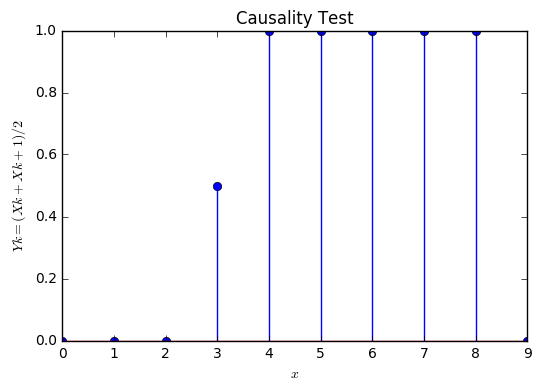

In [4]:
N=10 #Initialise the size of the signal

def step(n=0, N=20): #Re-creation the step function from Lab 1
    if n > N-1: 
        raise ValueError('n should be inferior to N-1')
        
    r = np.zeros((N,)) 
    for i in range (n, N):
        r[i] = 1
    return r

X=step(4, N) #Creation of the signal H(k-4)
Y=np.zeros((N,))#Initialize the answer of the function

for k in range (0, 9): #Apply the function
    Y[k]=(X[k]+X[k+1])/2

plt.stem(Y)#Plot the signal and add the title/labels
plt.xlabel(r'$x$')
plt.ylabel(r'$Yk=(Xk+Xk+1)/2$')
plt.title('Causality Test')
plt.show()

**1.2** Propose a modification to obtain a causal version

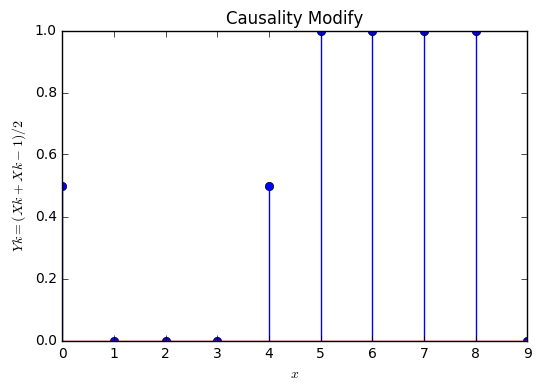

In [5]:
#To obtain a causal function I just change one argument in the function (replace X[k+1] by X[k-1])

y=np.zeros((N,)) #Initialize the answer of the function

for k in range (0, 9): #Apply the modified function
    y[k]=(X[k]+X[k-1])/2 

plt.stem(y) #Plot the signal and add the title/labels
plt.xlabel(r'$x$')
plt.ylabel(r'$Yk=(Xk+Xk-1)/2$')
plt.title('Causality Modify')
plt.show()

Comments on your observations

A causal function is a function that depends from the past or from the present and not from the future, like it's the case for the initial function.

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



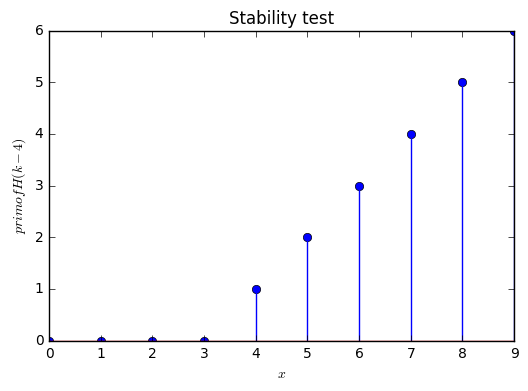

In [6]:
def prim(f, N):#Creation of the function prim(f)
    F=np.zeros((N,))#Initialize the answer
    for k in range (1, N):#Initialize a for loop to create an array as output
        F[k]=F[k-1]+f[k] #Store the primitive acculative value, by adding to the last value the current function input
    return F

R=prim(X, N)#Use the prim function
plt.stem(R)#Plot the signal and add the title/labels
plt.xlabel(r'$x$')
plt.ylabel(r'$prim of H(k-4)$')
plt.title('Stability test')
plt.show()

This system is not stable because it tends to the infinity for higher x, it won't stabilize at a fix value.


**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

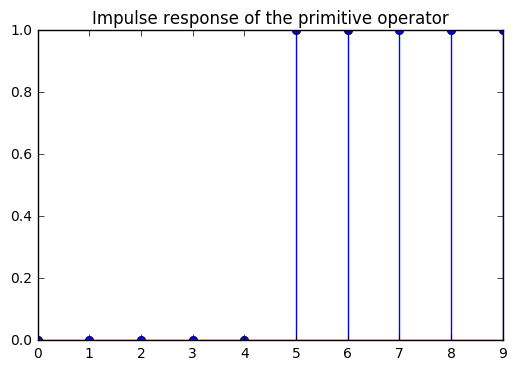

In [16]:
def dirac(n=0, N=20): #Dirac function from Lab 1
    if n > N-1: 
        raise ValueError('n should be inferior to N-1')
        
    s = np.zeros((N,)) 
    s[n] = 1
    return s

IR=dirac(5, N) #Create the impulse signal using the dirac function
R1=prim(IR, N) #Use the primitive operator on the impulse response

plt.stem(R1) #Plot the response and add the title
plt.title("Impulse response of the primitive operator")

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

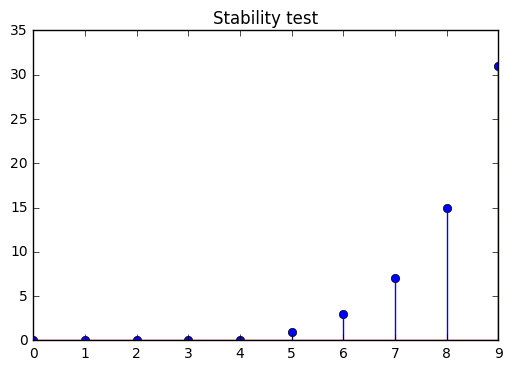

In [21]:
Xd = np.zeros((N,)) #Create the system using the impulse signal
for k in range (1, N):
    Xd[k]=IR[k]+2*Xd[k-1]

Rd=prim(Xd, N) #Use the primitive operator

plt.stem(Rd) #Plot the response and add the title
plt.title('Stability test')
plt.show()

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

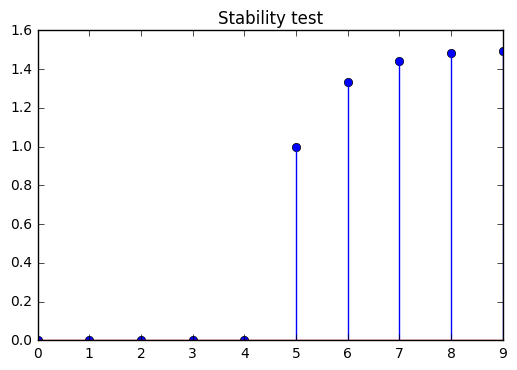

In [25]:
Xt = np.zeros((N,)) #Create the system using the impulse signal
for k in range (1, N):
    Xt[k]=IR[k]+(Xt[k-1])/3

Rt=prim(Xt, N) #Use the primitive operator

plt.stem(Rt) #Plot the response and add a title
plt.title('Stability test')
plt.show()

Comments your observations

The system 2.3 is not stable because it doesn't reach a value at the infinity but the system 2.4 will be stable at the infinity (around 1.5).

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


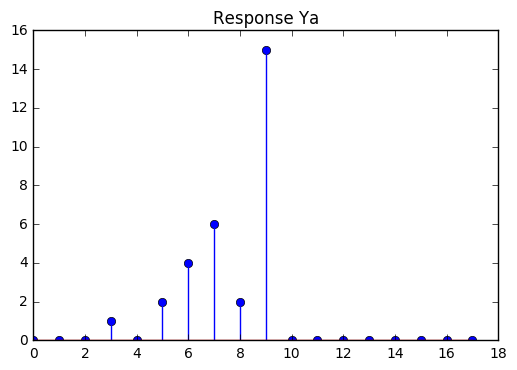

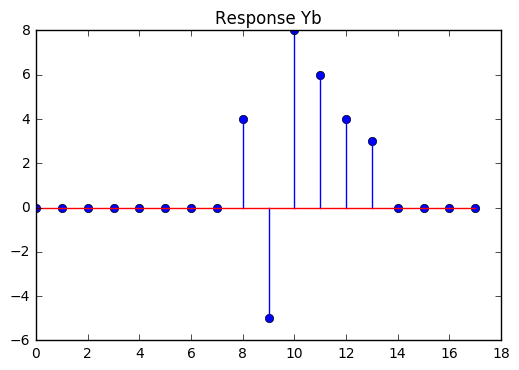

In [14]:
Xa = [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #Creation of Xa and Xb
Xb = [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0]

Ya = np.zeros(18) #Compute the resposes Ya and Yb
Yb = np.zeros(18)
for k in range (0, 18):
    Ya[k]= 3*Xa[k-1]-2*Xa[k]+Xa[k+1]
for k in range (0, 18):
    Yb[k]= 3*Xb[k-1]-2*Xb[k]+Xb[k+1]
    
plt.figure() #Plot the response and add a title
plt.stem(Ya)
plt.title("Response Ya")
plt.figure()
plt.stem(Yb)
plt.title("Response Yb")

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


This system is linear because we don't have 'crazy' oscillations and it's doesn't take infinite values at infinite times (stabilize at 0).
It is also invariant because in the equation, we don't care about the time.

**3.3** Propose a nonlinear/noninvariant system.

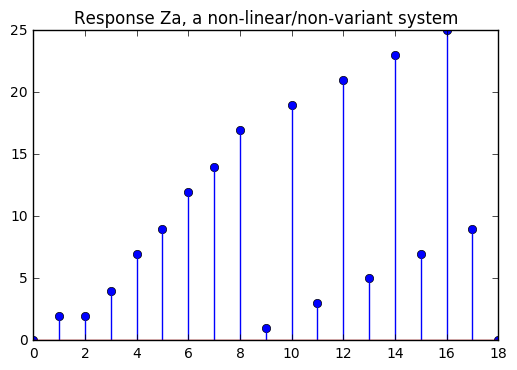

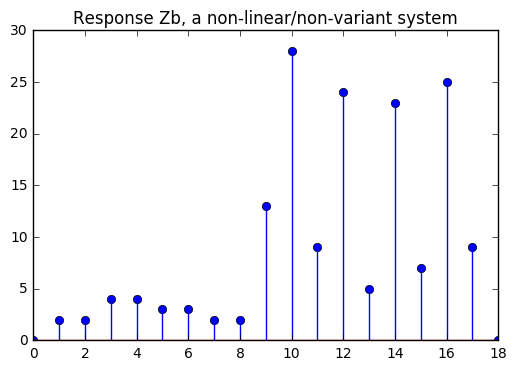

In [38]:
Za=np.zeros(19) #Create a nonlinear/nonvariant system
for k in range (0, 18):
    Za[k]= 3*Xa[k]+2*k-Za[k-1]
    
Zb=np.zeros(19)
for k in range (0, 18):
    Zb[k]= 3*Xb[k]+2*k-Za[k-1]
    
plt.figure() #Plot the response and add a title
plt.stem(Za)
plt.title("Response Za, a non-linear/non-variant system")
plt.figure() 
plt.stem(Zb)
plt.title("Response Zb, a non-linear/non-variant system")